In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt


In [10]:
df = pd.read_json("C:/Users/monik/Downloads/Riverline/data/twitter_conversations_tagged.json")

In [11]:
df

,primary_tweet_id,primary_tweet,tail_id,customer_id,company_id,chat_history,nature_of_support,sentiment,resolved,resolution_status,most_frequent_sentiment,most_frequent_support_type
0,8,@sprintcare is the worst customer service,2,115712,sprintcare,"[{'response_type': 'Customer', 'response': {'t...",Escalated Complaint,Negative,False,waiting_for_company,Negative,Escalated Complaint
1,18,@115714 y’all lie about your “great” connectio...,11,115713,sprintcare,"[{'response_type': 'Customer', 'response': {'t...",Technical Issue (Simple / Minor),Negative,False,waiting_for_customer,Negative,Technical Issue (Simple / Minor)
2,20,"@115714 whenever I contact customer support, t...",19,115715,sprintcare,"[{'response_type': 'Customer', 'response': {'t...",Technical Issue (Simple / Minor),Negative,False,waiting_for_customer,Negative,Technical Issue (Simple / Minor)
3,29,actually that's a broken link you sent me and ...,27,115716,Ask_Spectrum,"[{'response_type': 'Customer', 'response': {'t...",Customer Grievance,Negative,False,waiting_for_customer,Negative,Customer Grievance
4,31,"Yo @Ask_Spectrum, your customer service reps a...",30,115717,Ask_Spectrum,"[{'response_type': 'Customer', 'response': {'t...",Urgent Service Disruption,Negative,False,waiting_for_customer,Negative,Urgent Service Disruption
...,...,...,...,...,...,...,...,...,...,...,...,...
1040,5421,@hulu_support #Blindspot season two only goes ...,5420,116966,hulu_support,"[{'response_type': 'Customer', 'response': {'t...",Technical Issue (Simple / Minor),Negative,False,waiting_for_customer,Negative,Technical Issue (Simple / Minor)
1041,5423,@hulu_support Your support SUCKS!!!,5422,116967,hulu_support,"[{'response_type': 'Customer', 'response': {'t...",Customer Grievance,Negative,False,waiting_for_customer,Negative,Customer Grievance
1042,5426,"@hulu_support the Hulu app logged me out, &amp...",5427,116968,hulu_support,"[{'response_type': 'Customer', 'response': {'t...",Account or Login Issues,Negative,False,waiting_for_company,Negative,Account or Login Issues
1043,5429,@hulu_support when will we see @174 season 4 o...,5428,116969,hulu_support,"[{'response_type': 'Customer', 'response': {'t...",Other,Neutral,False,waiting_for_customer,Neutral,Other


In [12]:
def plot_counts(df, group_field, count_field, filter_value=None):

    if filter_value:
        df = df[df[group_field] == filter_value]
        if df.empty:
            print(f"No data for {group_field} = {filter_value}")
            return

    counts = df[count_field].value_counts()
    ax = counts.plot(kind='bar', title=f'{count_field} for {group_field}={filter_value}' if filter_value else f'{count_field} (Overall)')
    plt.xlabel(count_field)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    
    # Add count values on top of each bar
    for i, v in enumerate(counts.values):
        ax.text(i, v, str(v), ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()


In [13]:
df['company_id'].value_counts()

company_id
ChipotleTweets     124
AmazonHelp          91
Uber_Support        68
AppleSupport        63
Delta               44
                  ... 
YahooCare            1
USCellularCares      1
askpanera            1
SW_Help              1
O2                   1
Name: count, Length: 65, dtype: int64

In [22]:
df['customer_id'].value_counts()

customer_id
115911    7
116692    4
115712    3
116577    2
116855    2
         ..
116160    1
116161    1
116162    1
116163    1
116970    1
Name: count, Length: 1026, dtype: int64

### Nature of support vs Company

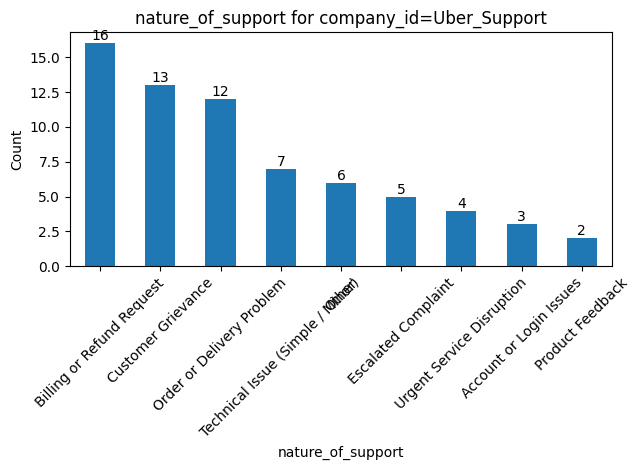

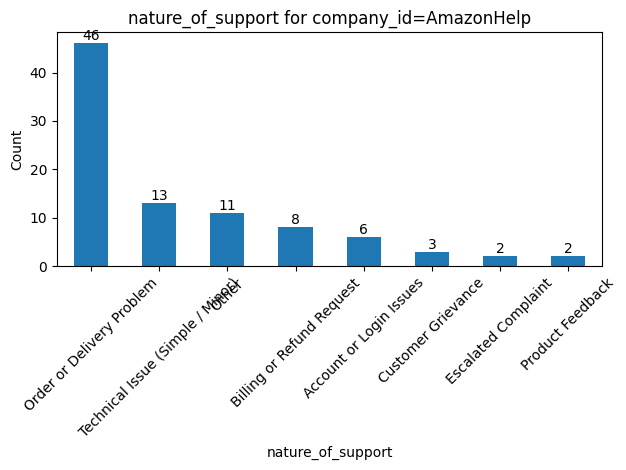

In [15]:

plot_counts(df, group_field='company_id', count_field='nature_of_support', filter_value='Uber_Support')
plot_counts(df, group_field='company_id', count_field='nature_of_support', filter_value='AmazonHelp')


### Nature of support vs Customer

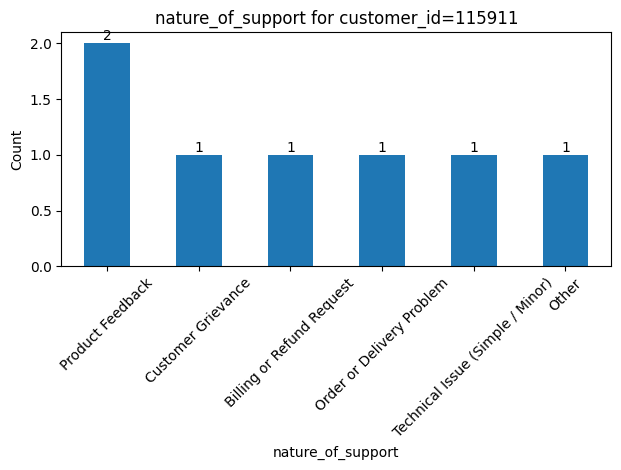

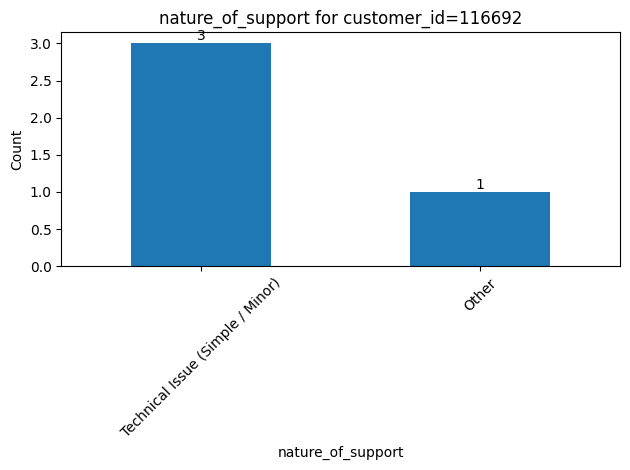

In [16]:

plot_counts(df, group_field='customer_id', count_field='nature_of_support', filter_value=115911)
plot_counts(df, group_field='customer_id', count_field='nature_of_support', filter_value=116692)

### Company vs Sentiment

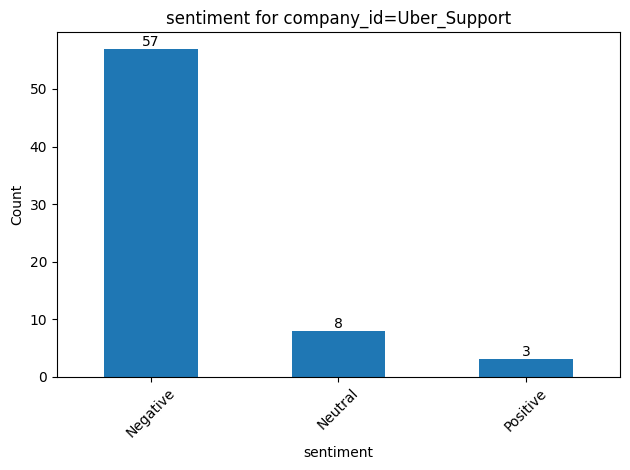

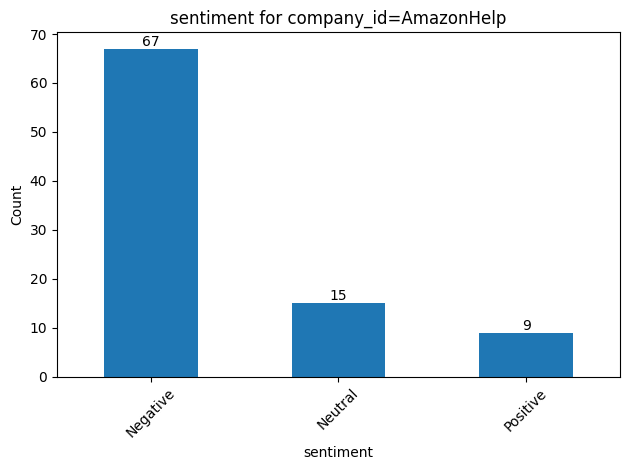

In [23]:

plot_counts(df, group_field='company_id', count_field='sentiment', filter_value="Uber_Support")
plot_counts(df, group_field='company_id', count_field='sentiment', filter_value="AmazonHelp")

### Customer vs Sentiment

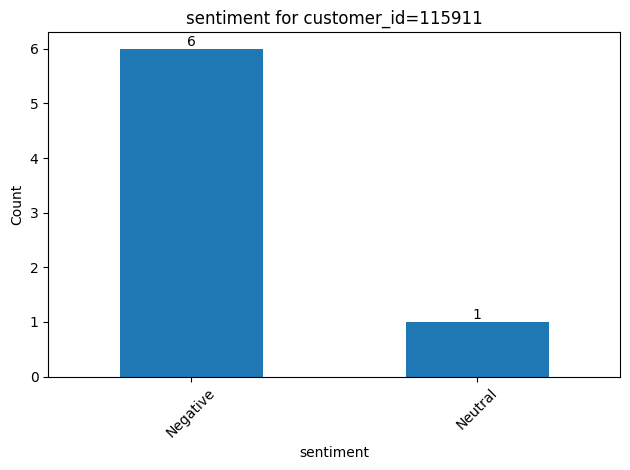

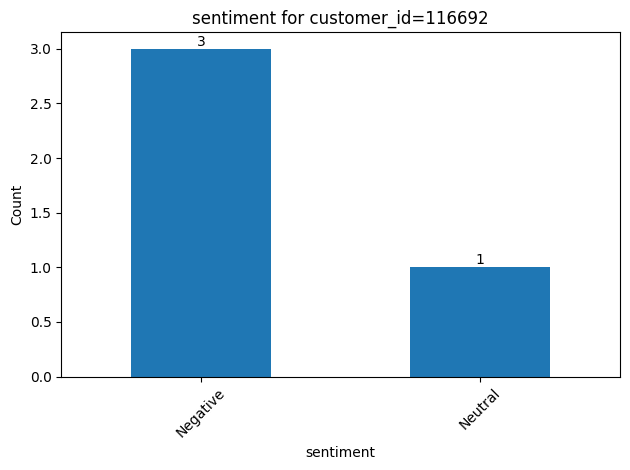

In [24]:

plot_counts(df, group_field='customer_id', count_field='sentiment', filter_value=115911)
plot_counts(df, group_field='customer_id', count_field='sentiment', filter_value=116692)



In [25]:
## Conversation length
df['conversation_length'] = df['chat_history'].apply(len)


df[['customer_id', 'sentiment', 'conversation_length']].head()

,customer_id,sentiment,conversation_length
0,115712,Negative,7
1,115713,Negative,6
2,115715,Negative,2
3,115716,Negative,9
4,115717,Negative,2


### Conversation Length by Customer Sentiment - Distribution

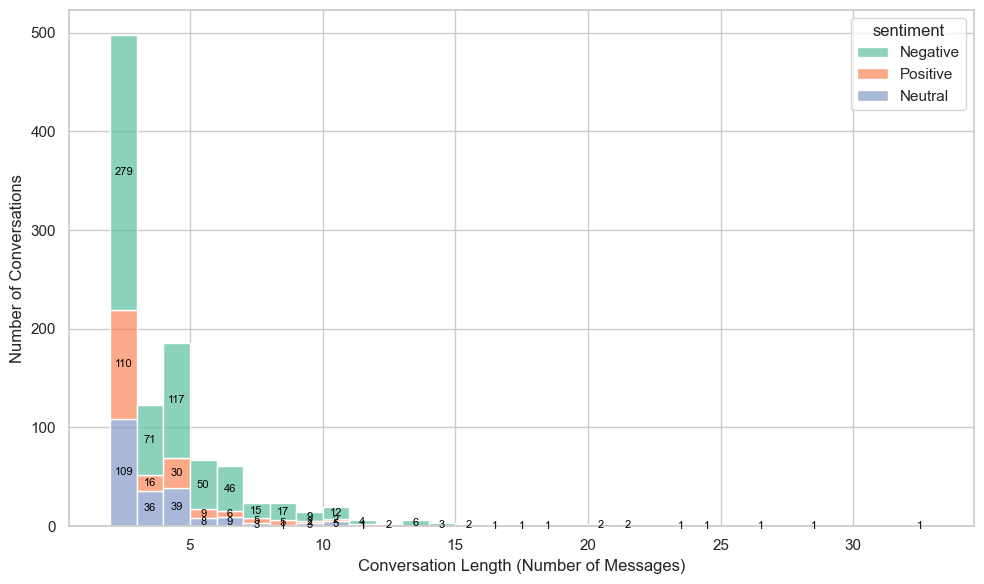

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
hist = sns.histplot(
    data=df,
    x='conversation_length',
    hue='sentiment',
    multiple='stack',
    binwidth=1,
    palette='Set2'
)

cumulative_heights = {}

for bar in hist.patches:
    x = bar.get_x() + bar.get_width() / 2
    height = bar.get_height()
    width = bar.get_width()

    if height == 0:
        continue

    bin_center = round(x, 2)

    current_y = cumulative_heights.get(bin_center, 0)

    label_y = current_y + height / 2

    hist.text(x, label_y, str(int(height)), ha='center', va='center', fontsize=8, color='black')

    cumulative_heights[bin_center] = current_y + height


plt.xlabel("Conversation Length (Number of Messages)")
plt.ylabel("Number of Conversations")
plt.tight_layout()
plt.show()


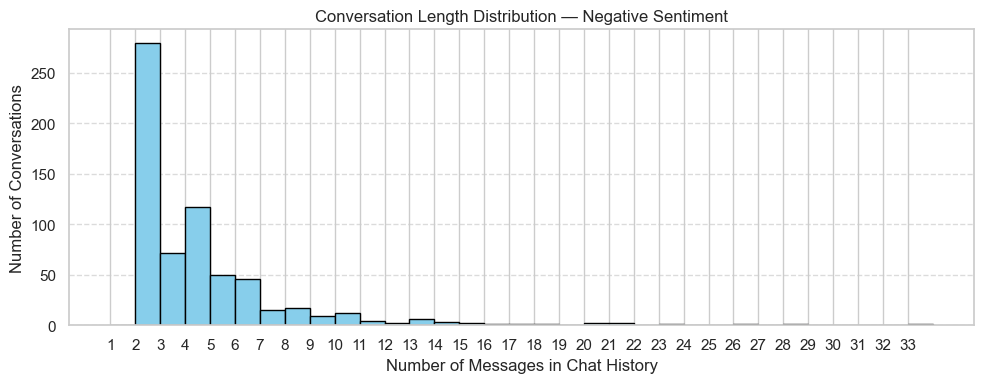

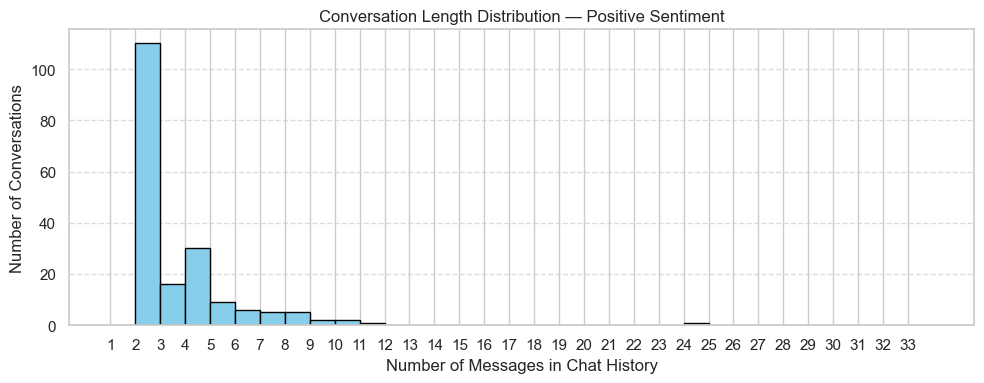

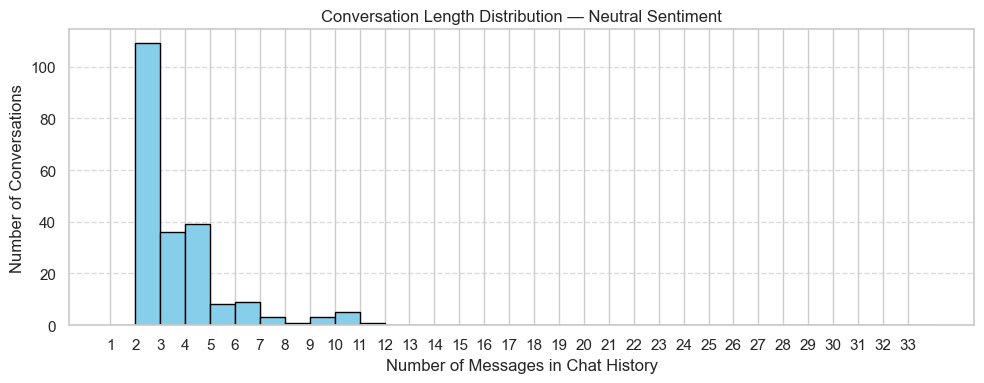

In [28]:
import matplotlib.pyplot as plt

sentiments = df['sentiment'].unique()


for sentiment in sentiments:
    subset = df[df['sentiment'] == sentiment]
    plt.figure(figsize=(10, 4))
    plt.hist(subset['conversation_length'], bins=range(1, max(df['conversation_length']) + 2), color='skyblue', edgecolor='black')
    plt.title(f'Conversation Length Distribution — {sentiment} Sentiment')
    plt.xlabel('Number of Messages in Chat History')
    plt.ylabel('Number of Conversations')
    plt.xticks(range(1, max(df['conversation_length']) + 1))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


### Conversation Length vs Nature of support -Distribution

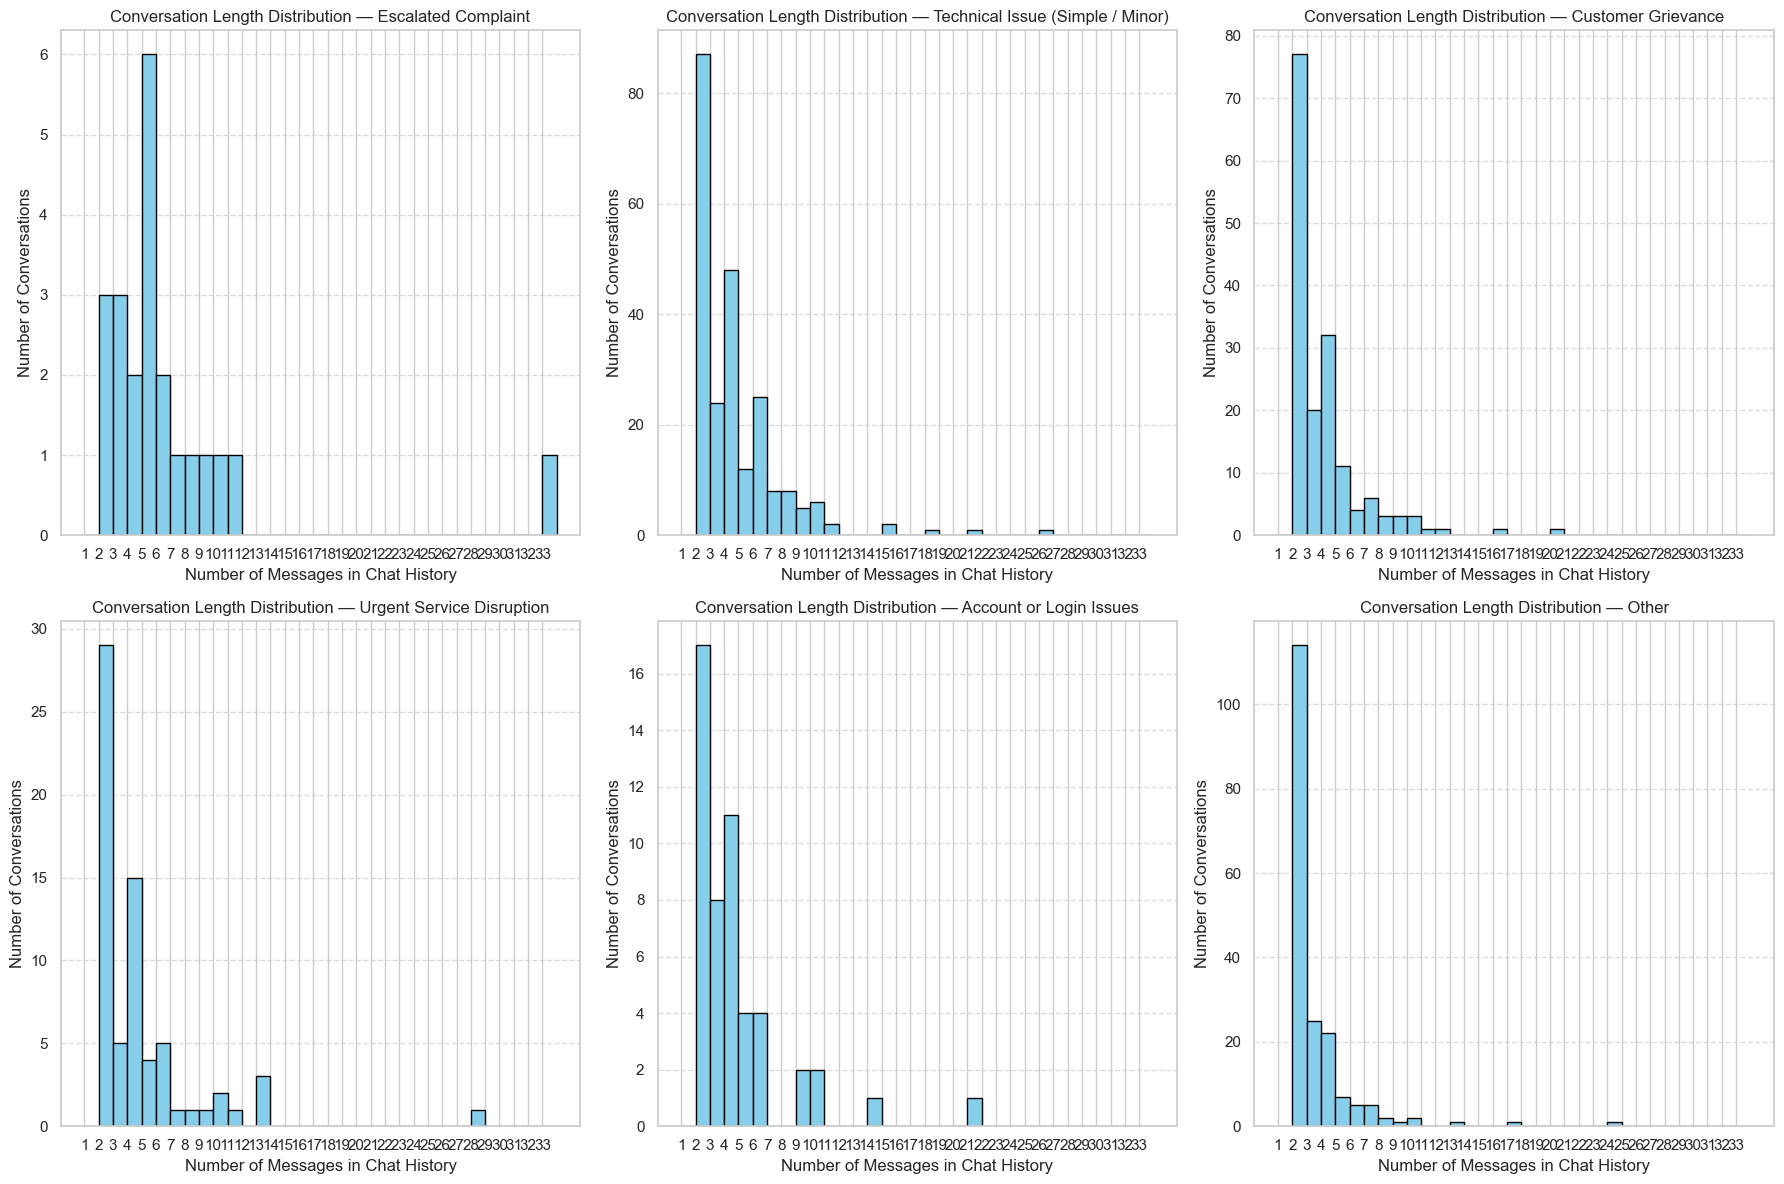

In [29]:
import matplotlib.pyplot as plt

# Unique natures of support
natures = df['nature_of_support'].unique()

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, nature in enumerate(natures):
    if i < len(axes):
        subset = df[df['nature_of_support'] == nature]
        axes[i].hist(subset['conversation_length'], bins=range(1, max(df['conversation_length']) + 2), 
                    color='skyblue', edgecolor='black')
        axes[i].set_title(f'Conversation Length Distribution — {nature}')
        axes[i].set_xlabel('Number of Messages in Chat History')
        axes[i].set_ylabel('Number of Conversations')   
        axes[i].set_xticks(range(1, max(df['conversation_length']) + 1))
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)


for i in range(len(natures), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()
